This code will use the "BMP Storm Event Number" instead of the timestamp

In [ ]:
#random import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Download the google sheets data as a CSV file and run this cell. 
#Drag the downloaded CSV into the choose file portion when this cell is run
from google.colab import files
uploaded = files.upload()

Saving VU-Infiltration - Sheet1 (10).csv to VU-Infiltration - Sheet1 (10).csv


In [ ]:
#MAKE SURE TO RENAME THE PARAMETER with the name of the new CSV file
df = pd.read_csv('VU-Infiltration - Sheet1 (10).csv')

In [ ]:
concentration = df['Numeric Result']
event_number = df['BMP Storm Event Numnber']

n = len(event_number)


In [ ]:
#If you want to change the type of regression model
#change the parameters and follow the pattern
def objective_linear(t,l0,l1):
  return l0 + (l1*t)

from scipy.optimize import curve_fit

#c is the important variable that holds the value of the coefficients for the objective function
x = event_number
l, cov = curve_fit(objective_linear, x, concentration)

#determines the y-value based on the curve of best fit
linear_guess_y = np.empty(n)
for i in range(n):
  #MAKE SURE THAT THE c[*] PARAMETER MATCHES THE OBJECTIVE FUNCTION PARAMETERS
  linear_guess_y[i] = objective_linear(int(x[i]),l[0],l[1])

In [ ]:
def objective_cubic(t, c0,c1,c2,c3):
   return c0 + (c1*t) + c2*(t**2) + c3*(t**3)

c, cov = curve_fit(objective_cubic, x, concentration)
#determines the y-value based on the curve of best fit
cubic_guess_y = np.empty(n)
for i in range(n):
  #MAKE SURE THAT THE c[*] PARAMETER MATCHES THE OBJECTIVE FUNCTION PARAMETERS
  cubic_guess_y[i] = objective_cubic(int(x[i]),c[0],c[1],c[2],c[3])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

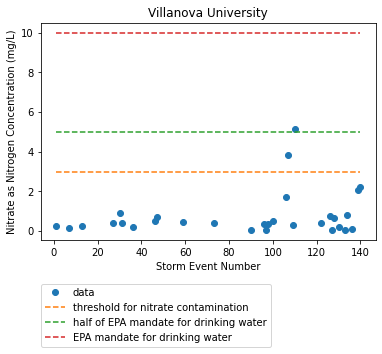

In [ ]:
def objective_quintic(t,q0,q1,q2,q3,q4,q5):
  return q0 + (q1*t) + q2*(t**2) + q3*(t**3) + q4*(t**4) + q5*(t**5)

q, cov = curve_fit(objective_quintic, x, concentration)
#determines the y-value based on the curve of best fit
quintic_guess_y = np.empty(n)
for i in range(n):
  #MAKE SURE THAT THE c[*] PARAMETER MATCHES THE OBJECTIVE FUNCTION PARAMETERS
  quintic_guess_y[i] = objective_quintic(int(x[i]),q[0],q[1],q[2],q[3],q[4],q[5])

y_three = np.empty(n)
for i in range(n):
  y_three[i] = 3

y_five = np.empty(n)
for i in range(n):
  y_five[i] = 5

y_ten = np.empty(n)
for i in range(n):
  y_ten[i] = 10



'''def objective_sexic(t,q0,q1,q2,q3,q4,q5,q6):
  return q0 + (q1*t) + q2*(t**2) + q3*(t**3) + q4*(t**4) + q5*(t**5) + q6*(t**6)

q, cov = curve_fit(objective_quintic, x, concentration)
#determines the y-value based on the curve of best fit
sexic_guess_y = np.empty(n)
for i in range(n):
  #MAKE SURE THAT THE c[*] PARAMETER MATCHES THE OBJECTIVE FUNCTION PARAMETERS
  sexic_guess_y[i] = objective_quintic(int(x[i]),q[0],q[1],q[2],q[3],q[4],q[5],q[6])


def objective_all(t, a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
  return a0 + (a1*t) + a2*(t**2) + a3*(t**3) + a4*(t**4) + a5*(t**5) + a6*(t**6) + a7*(t**7) + a8*(t**8) + a9*(t**9) + a10*(t**10)

a, cov = curve_fit(objective_all,x,concentration)
all_guess_y = np.empty(n)
for i in range(n):
  all_guess_y[i] = objective_all(int(x[i]),a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10])

def objective_allpt2(t, a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14):
  return a0 + (a1*t) + a2*(t**2) + a3*(t**3) + a4*(t**4) + a5*(t**5) + a6*(t**6) + a7*(t**7) + a8*(t**8) + a9*(t**9) + a10*(t**10) + a11*(t**11) + a12*(t**12) + a13*(t**13) + a14*(t**14)

g, cov = curve_fit(objective_allpt2,x,concentration)
allpt2_guess_y = np.empty(n)
for i in range(n):
  allpt2_guess_y[i] = objective_allpt2(int(x[i]),g[0],g[1],g[2],g[3],g[4],g[5],g[6],g[7],g[8],g[9],g[10],g[11],g[12],g[13],g[14])
'''

plt.plot(x, concentration, 'o')
#plt.plot(x, linear_guess_y, 'g')
#plt.plot(x,cubic_guess_y, 'r')
#plt.plot(x, quintic_guess_y, 'm')
plt.plot(x, y_three, '--')
plt.plot(x, y_five, '--')
plt.plot(x, y_ten, '--')
#plt.plot(x, sexic_guess_y)
#plt.plot(x, all_guess_y,'c')
#plt.plot(x, allpt2_guess_y)

plt.xlabel('Storm Event Number')
plt.ylabel('Nitrate as Nitrogen Concentration (mg/L)')
plt.title('Villanova University')

#plt.legend(['data', 'linear','cubic','quintic'])
plt.legend(['data', 'threshold for nitrate contamination', 'half of EPA mandate for drinking water', 'EPA mandate for drinking water'], bbox_to_anchor=(0, -0.2), loc=2, borderaxespad=0.)
#plt.legend(['data','linear', 'cubic', 'quintic','decic'])

from google.colab import files
plt.savefig("VillanovaUniversityRegression.png")
files.download("VillanovaUniversityRegression.png")

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(concentration, linear_guess_y) ** 0.5)
print(r2_score(concentration, cubic_guess_y) ** 0.5)
print(r2_score(concentration, quintic_guess_y)** 0.5)
#print(r2_score(concentration, sexic_guess_y)** 0.5)



0.2544567647357419
0.27352658605927305
0.3315952436184721


In [ ]:
#linear 
print("linear ", l[0],l[1])

linear  0.037781132437766665 0.017425341941989983


Puts the data in the perspective of concentration change relative to the beginning value

Attempt to predict the next 5 values based on the data model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pittsboro - Test Data (6).csv to Pittsboro - Test Data (6).csv


In [ ]:
#MAKE SURE TO RENAME THE PARAMETER with the name of the new CSV file
df = pd.read_csv('Pittsboro - Test Data (6).csv')

test_concentration = df['Numeric Result']
test_event_number = df['BMP Storm Event Numnber']

x values  [26. 27. 28. 29. 30.]
y  [0.08996996 0.02842081 0.13427935 0.28327074 0.25662834]


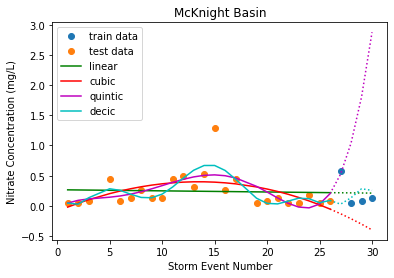

In [ ]:
number_needed = len(test_event_number) + 1

predict_x = np.empty(number_needed)

predict_x[0] = x[n-1]

for r in range(number_needed-1):
  predict_x[r+1] = test_event_number[r]

print("x values ", predict_x)

quintic_predict_y = np.empty(number_needed)
cubic_predict_y = np.empty(number_needed)
linear_predict_y = np.empty(number_needed)
all_predict_y = np.empty(number_needed)

quintic_predict_y[0] = quintic_guess_y[n-1]
cubic_predict_y[0] = cubic_guess_y[n-1]
linear_predict_y[0] = linear_guess_y[n-1]
all_predict_y[0] = all_guess_y[n-1]

for r in range(number_needed-1):
  quintic_predict_y[r+1] = objective_quintic(int(predict_x[r+1]),q[0],q[1],q[2],q[3],q[4],q[5])
  linear_predict_y[r+1] = objective_linear(int(predict_x[r+1]),l[0],l[1])
  cubic_predict_y[r+1] = objective_cubic(int(predict_x[r+1]), c[0], c[1],c[2],c[3])
  all_predict_y[r+1] = objective_all(int(x[r+1]),a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10])
  
print("y ", all_predict_y)

#print(round(q[0],3), " + ", round(q[1],5),"t", "+ ", round(q[2],5), "t^2", round(q[3],5), "t^3", round(q[4],9), "t^4", round(q[5],9), "t^5")
plt.plot(test_event_number, test_concentration,'o')
plt.plot(x, concentration,'o')
plt.plot(x,linear_guess_y,'g')
plt.plot(x, cubic_guess_y,'r')
plt.plot(x, quintic_guess_y,'m')
plt.plot(x, all_guess_y, 'c')

plt.plot(predict_x,linear_predict_y, 'g:')
plt.plot(predict_x, cubic_predict_y,'r:')
plt.plot(predict_x, quintic_predict_y,'m:')
plt.plot(predict_x, all_predict_y,'c:')

plt.xlabel('Storm Event Number')
plt.ylabel('Nitrate Concentration (mg/L)')
plt.title('McKnight Basin')
plt.legend(['train data','test data','linear', 'cubic', 'quintic','decic'])


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_concentration, [linear_predict_y[1],linear_predict_y[2],linear_predict_y[3],linear_predict_y[4]]))
print(mean_squared_error(test_concentration, [cubic_predict_y[1],cubic_predict_y[2],cubic_predict_y[3],cubic_predict_y[4]]))
print(mean_squared_error(test_concentration, [quintic_predict_y[1],quintic_predict_y[2],quintic_predict_y[3],quintic_predict_y[4]]))
print(mean_squared_error(test_concentration, [all_predict_y[1],all_predict_y[2],all_predict_y[3],all_predict_y[4]]))

0.04489717245750733
0.24976529685551324
2.862672149371562
0.0902140347135916


In [ ]:
# from google.colab import files
# plt.savefig("McKnightBasinGraph.png")
# files.download("McKnightBasinGraph.png")

In [ ]:
'''correlation_matrix = np.corrcoef(test_concentration, [linear_predict_y[1],linear_predict_y[2],linear_predict_y[3],linear_predict_y[4]])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

correlation_matrix = np.corrcoef(test_concentration, [cubic_predict_y[1],cubic_predict_y[2],cubic_predict_y[3],cubic_predict_y[4]])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

correlation_matrix = np.corrcoef(test_concentration, [quintic_predict_y[1],quintic_predict_y[2],quintic_predict_y[3],quintic_predict_y[4]])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

correlation_matrix = np.corrcoef(test_concentration,  [all_predict_y[1],all_predict_y[2],all_predict_y[3],all_predict_y[4]])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)'''

0.45336927216545225
0.4246242609604636
0.3149932397203698
0.5819566867875301
